### Muhammad Rafi Andeo Praja

### 1301200278

### Penggunaan Library:

Pandas -> Melakukan import dataset

Numpy -> Melakukan pengolahan dataset

Matplotlib -> Melakukan pemodelan dataset berupa grafik

Seaborn -> Melakukan pemodelan dataset dengan atribut lebih dari satu

Plotly.express -> Melakukan pemodelan yang dapat diinteraksi oleh user

StandardScaler -> Melakukan proses data preprocesing dengan metode Scaling menggunakan Standardization

Cluster -> Melakukan proses evaluasi KMeans yang dimana membutuhkan inertia dari hasil KMeans (Penggunaan Cluster tidak digunakan dalam melakukan prediksi dataset, melainkan hanya sebagai evaluasi)

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn import cluster

### Menampilkan isi dataset 5 teratas dan 5 terbawah

In [31]:
df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [32]:
df.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


### Menampilkan jumlah baris dan jumlah features dataset

In [33]:
df.shape

(167, 10)

### Menampilkan jumlah missing value dataset

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [35]:
df.isnull().any()

country       False
child_mort    False
exports       False
health        False
imports       False
income        False
inflation     False
life_expec    False
total_fer     False
gdpp          False
dtype: bool

### Mencari attribute yang memiliki outlier value atau value yang bernilai tidak wajar

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:156: UserWarning:

The handle <matplotlib.patches.Patch object at 0x7f1889a457f0> has a label of '_nolegend_' which cannot be automatically added to the legend.



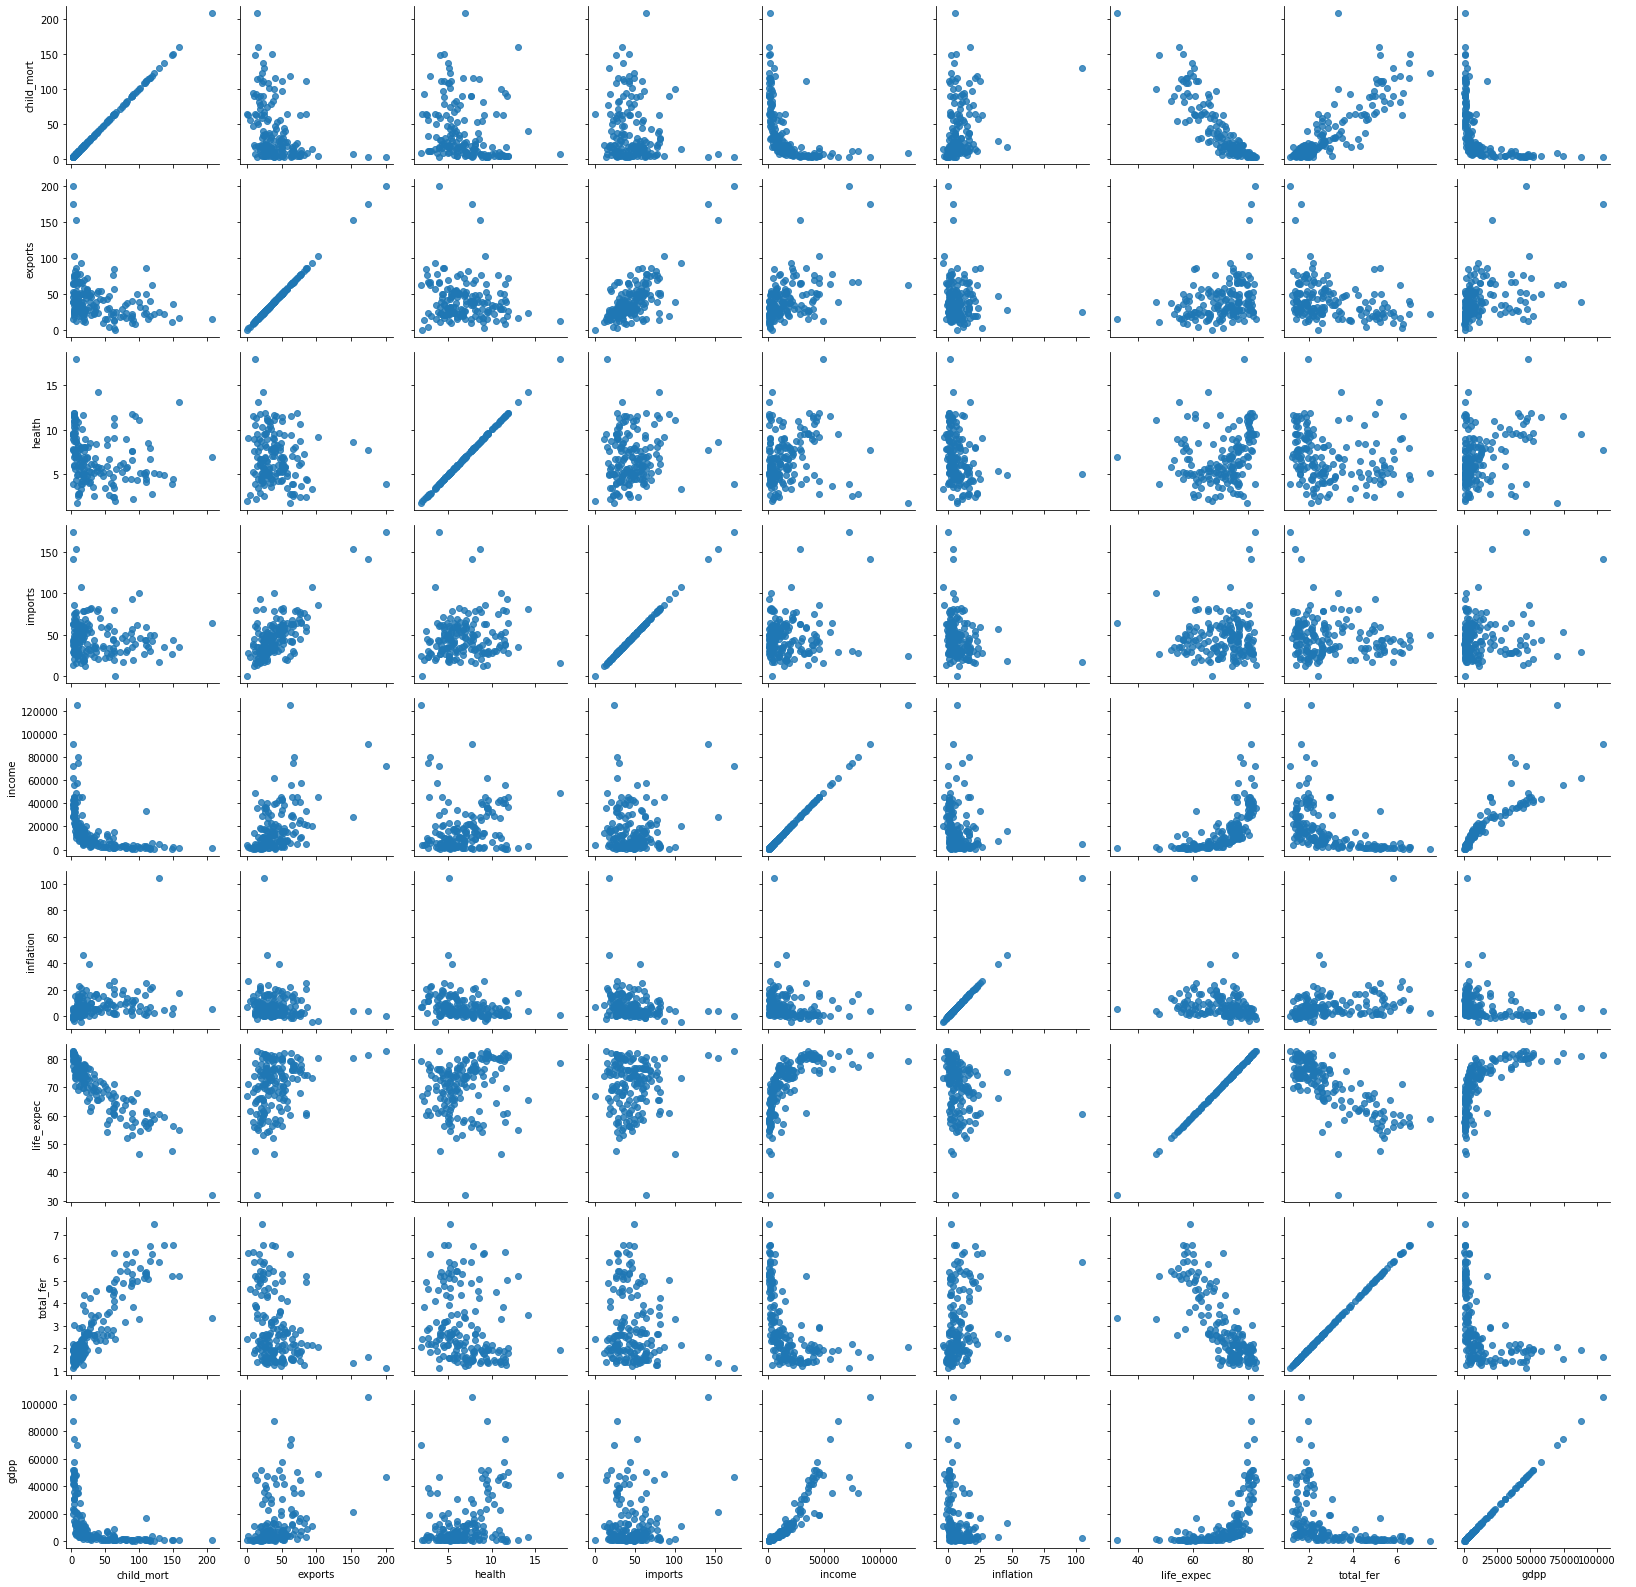

In [36]:
g = sns.PairGrid(df, vars=['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp'], palette='mako')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

In [37]:
sorted(df['child_mort'], reverse=True)[:10]

[208.0, 160.0, 150.0, 149.0, 137.0, 130.0, 123.0, 119.0, 116.0, 116.0]

In [38]:
sorted(df['exports'], reverse=True)[:10]

[200.0, 175.0, 153.0, 103.0, 93.8, 86.9, 85.8, 85.1, 81.8, 77.7]

In [39]:
sorted(df['health'], reverse=True)[:10]

[17.9, 14.2, 13.1, 11.9, 11.9, 11.8, 11.7, 11.6, 11.6, 11.5]

In [40]:
sorted(df['imports'], reverse=True)[:10]

[174.0, 154.0, 142.0, 108.0, 101.0, 92.6, 86.5, 81.7, 81.2, 81.0]

In [41]:
sorted(df['income'], reverse=True)[:10]

[125000, 91700, 80600, 75200, 72100, 62300, 57600, 55500, 49400, 45700]

In [42]:
sorted(df['inflation'], reverse=True)[:10]

[104.0, 45.9, 39.2, 26.5, 24.9, 23.6, 22.8, 22.4, 20.9, 20.8]

In [43]:
sorted(df['life_expec'], reverse=False)[:10]

[32.1, 46.5, 47.5, 52.0, 53.1, 54.3, 54.5, 55.0, 55.6, 56.2]

In [44]:
sorted(df['total_fer'], reverse=True)[:10]

[7.49, 6.59, 6.55, 6.54, 6.26, 6.23, 6.16, 6.15, 5.87, 5.84]

In [45]:
sorted(df['gdpp'], reverse=True)[:10]

[105000, 87800, 74600, 70300, 58000, 52100, 51900, 50300, 48700, 48400]

### Melakukan proses scaling terhadap dataset

In [46]:
data = df.drop(columns = "country")

In [47]:
pureData = data
data = pd.DataFrame(StandardScaler().fit_transform(data), columns = data.columns)

In [48]:
pureData.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [49]:
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


### Menghitung perhitungan jarak menggunakan formula euclidean distance

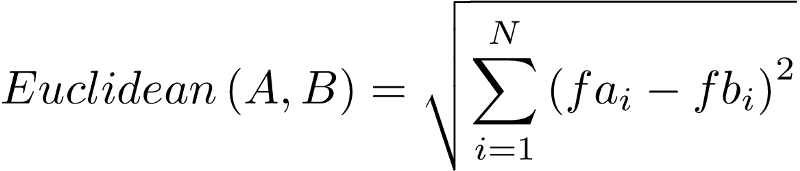

In [50]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

### Algoritma Unsupervised Learning KMeans

In [51]:
class KMeans:

    def __init__(self, k, x, max_iterations):

        self.k = k
        self.max_iterations = max_iterations
        self.num_examples, self.num_features = x.shape
        self.plot_figure = True

    def initialize_random_centroids(self, x):

        centroids = np.zeros((self.k, self.num_features))

        for i in range(self.k):
            centroid = x[np.random.choice(range(self.num_examples))]
            centroids[i] = centroid

        return centroids

    def create_cluster(self, x, centroids):

        clusters = [[] for i in range(self.k)]

        for point_index, point in enumerate(x):
            closest_centroid = np.argmin(np.sqrt(np.sum((point-centroids)**2, axis=1)))
            clusters[closest_centroid].append(point_index)

        return clusters 

    def calculate_new_centroids(self, cluster, x):

        centroids = np.zeros((self.k, self.num_features))

        for index, cluster in enumerate(cluster):
            new_centroid = np.mean(x[cluster], axis=0)
            centroids[index] = new_centroid

        return centroids

    def predict_cluster(self, clusters, x):

        y_pred = np.zeros(self.num_examples)

        for cluster_index, cluster in enumerate(clusters):
            for sample_index in cluster:
                y_pred[sample_index] = cluster_index

        return y_pred

    def plot_fig(self, x, y):

        fig = px.scatter(x[:, 0], x[:, 1], color=y)
        fig.show()

    def fit(self, x):

        centroids = self.initialize_random_centroids(x)

        for i in range(self.max_iterations):
            clusters = self.create_cluster(x, centroids)
            previous_centroids = centroids
            centroids = self.calculate_new_centroids(clusters, x)
            diff = centroids - previous_centroids
            if not diff.any():
                break

        y_pred = self.predict_cluster(clusters, x)
        if self.plot_figure:
            self.plot_fig(x, y_pred)

        return y_pred

#source = https://www.kaggle.com/code/adinishad/kmeans-clustering-from-scratch#KMeans-From-Scratch

In [56]:
clusters = 3
max_iterations = 150
x = data.values
y_pred = KMeans(clusters, x, max_iterations)
y_pred.fit(x)

array([0., 1., 1., 0., 1., 1., 1., 2., 2., 1., 1., 2., 1., 1., 1., 2., 1.,
       0., 1., 1., 1., 1., 1., 2., 1., 0., 0., 1., 0., 2., 1., 0., 0., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 2., 2., 2., 1., 1., 1., 1., 0., 0.,
       1., 1., 2., 2., 0., 0., 1., 2., 0., 2., 1., 1., 0., 0., 1., 0., 1.,
       2., 1., 1., 1., 1., 2., 2., 2., 1., 2., 1., 1., 0., 0., 2., 1., 0.,
       1., 1., 0., 0., 1., 1., 2., 1., 0., 0., 1., 1., 0., 2., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 2., 2., 0., 0., 2., 1., 0., 1., 1.,
       1., 1., 1., 2., 2., 1., 1., 0., 1., 1., 0., 1., 1., 0., 2., 2., 2.,
       1., 0., 2., 2., 1., 1., 0., 1., 2., 2., 1., 0., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 2., 2., 2., 1., 1., 1., 1., 1., 0., 0.])

### Evaluasi Algoritma Unsupervised Learning

Elbow Method

Text(0, 0.5, 'Inertia')

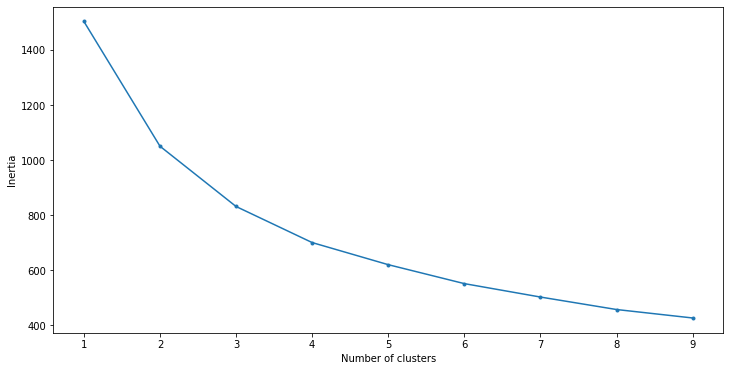

In [53]:
jarak_total = []
k = range(1, 10)
for i in k:
    kmeans = cluster.KMeans(n_clusters = i, init='k-means++')
    kmeans.fit(x)
    jarak_total.append(kmeans.inertia_)

frame = pd.DataFrame({'Cluster':range(1, 10), 'SSE':jarak_total})
plt.figure(figsize=(12, 6))
plt.plot(frame['Cluster'], frame['SSE'], marker=".")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

#source = https://www.kaggle.com/code/adinishad/kmeans-clustering-from-scratch#KMeans-From-Scratch 
#source 2 = Kurniawan, Dios. 2020. Pengenalan Machine Learning dengan Python. Jakarta: PT Elex Media Komputindo

### Kesimpulan

Penggunaan algoritma KMeans merupakan salah satu algoritma unsupervised learning yang dimana tidak menggunakan data testing yang dapat menjadi acuan dalam pengembangan prediksi dataset. Penggunaan algoritma KMeans juga memerlukan K sebagai cluster yang dimana membagi beberapa tipe dari dataset yang sudah dilakukan prediksi. Nilai K dapat dievaluasi melalui salah satu cara evaluasi algoritma unsupervised learning menggunakan elbow method yang menampilkan nilai K terbaik berdasarkan acuan miringnya sebuah garis di suatu titik clusters atau titik nilai K. Berdasarkan hasil tersebut, saya menyimpulkan bahwa algoritma KMeans dapat dikatakan kurang baik dalam mengolah dataset tersebut dengan hasil plotting yang masih bersebaran atau tidak dikelompokkan.